This notebook repeats the trials of SETimes model on Twitter data, but on user level, as agreed during the todays meeting.

In [1]:
import pickle
import fasttext

In [2]:
with open("/home/peterr/macocu/taskB/data/final/twitter_full_ds.pickle", "rb") as f:
    dataset = pickle.load(f)

In [14]:
texts, languages, counts = [], [], []
for user, payload in dataset.items():
    tweets = payload["tweets"]
    lang = payload["language"]
    texts.append(" ".join(tweets))
    languages.append(lang)
    counts.append(len(tweets))

In [15]:
import pandas as pd
df = pd.DataFrame(data={"text": texts, "labels": languages, "counts": counts},)
df.head()

,text,labels,counts
0,Hahahaha! i ja iz pera Sjajno! Kruha & Ig...,hr,206
1,Like it. Jureći ljubav. Novi singl Goribora. ...,sr,680
2,Ali nije mi ... Hvala Mrzim kad mi neko kaže...,sr,786
3,"Today stats: 36 followers, 2 unfollowers and f...",sr,499
4,"4 leka koja treba da koristim za uho,ah a ja...",sr,464


In [5]:
model = fasttext.load_model("/home/peterr/macocu/taskB/data/models/fasttext_4.bin")

In [6]:
model.predict("Saobračajna avarija")

(('__label__sr',), array([0.77856201]))

In [7]:
model.predict(df.text.values.tolist()[:3])[0]

[['__label__bs'], ['__label__sr'], ['__label__sr']]

In [8]:
y_pred = model.predict(df.text.str.replace("\n", "").values.tolist())

In [9]:
predicted_languages = [i[0][-2:] for i in y_pred[0]]
df["y_pred"] = predicted_languages

In [10]:
from sklearn.metrics import f1_score, ConfusionMatrixDisplay, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

macro = f1_score(df.labels, df.y_pred, labels=[
                 "hr", "sr", "bs", "me"], average="macro")
micro = f1_score(df.labels, df.y_pred, labels=[
                 "hr", "sr", "bs", "me"],  average="micro")
acc = accuracy_score(df.labels, df.y_pred)
print(f"Macro f1: {macro:0.3}\nMicro f1: {micro:0.3}\nAccuracy: {acc:0.3}")


Macro f1: 0.379
Micro f1: 0.707
Accuracy: 0.707


In [11]:
df.groupby("labels").count()

,text,y_pred
labels,,
bs,75,75
hr,89,89
me,56,56
sr,394,394


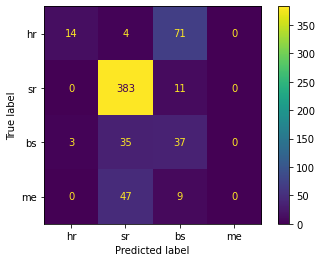

In [13]:
cm = confusion_matrix(df.labels, df.y_pred, labels=[
                 "hr", "sr", "bs", "me"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[
                 "hr", "sr", "bs", "me"])
disp.plot()
plt.savefig("images/SETimes_model_on_twitter_CM_on_user_level.png")
plt.show()


In [18]:
df.counts.describe()

count     614.000000
mean      635.615635
std       430.146903
min       100.000000
25%       280.000000
50%       489.000000
75%       925.750000
max      1779.000000
Name: counts, dtype: float64